In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [7]:
ogdir='/users/PAS1330/osu9659/src/y3-3x2pt/code/original_chains/'
trimdir='/users/PAS1330/osu9659/src/y3-3x2pt/code/trimmed_chains/'
os.listdir(ogdir)

['chain_cs_gt_fiducial_lcdm.txt',
 'chain_2x2pt_lcdm_noSR_maglim.txt',
 'chain_2x2pt_wcdm_noSR_maglim.txt',
 'chain_cs_gt_lcdm_SR_maglim.txt',
 'chain_cs_gt_wcdm_SR_maglim.txt']

/users/PAS1330/osu9659/src/y3-3x2pt/code/trimmed_chains/chain_cs_gt_fiducial_lcdm.txt 7290 399 6891


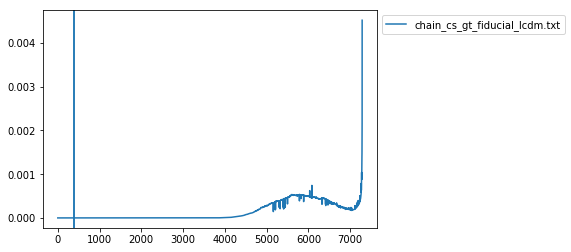

/users/PAS1330/osu9659/src/y3-3x2pt/code/trimmed_chains/chain_2x2pt_lcdm_noSR_maglim.txt 20782 2005 18777


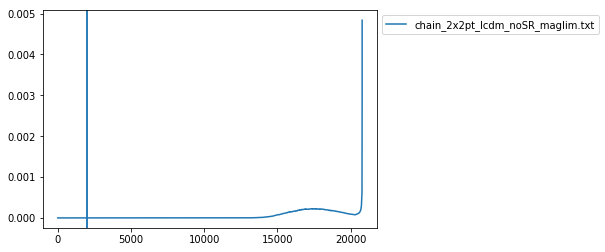

/users/PAS1330/osu9659/src/y3-3x2pt/code/trimmed_chains/chain_2x2pt_wcdm_noSR_maglim.txt 20882 1930 18952


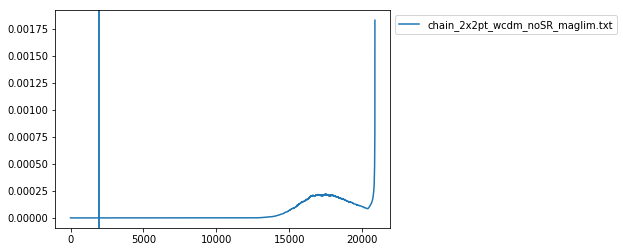

/users/PAS1330/osu9659/src/y3-3x2pt/code/trimmed_chains/chain_cs_gt_lcdm_SR_maglim.txt 16706 909 15797


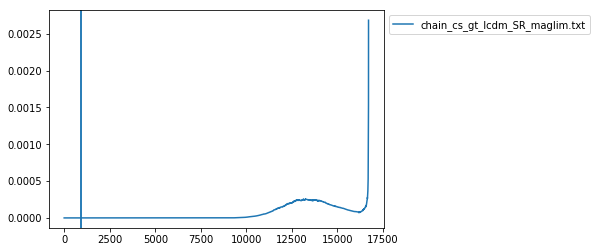

/users/PAS1330/osu9659/src/y3-3x2pt/code/trimmed_chains/chain_cs_gt_wcdm_SR_maglim.txt 16789 903 15886


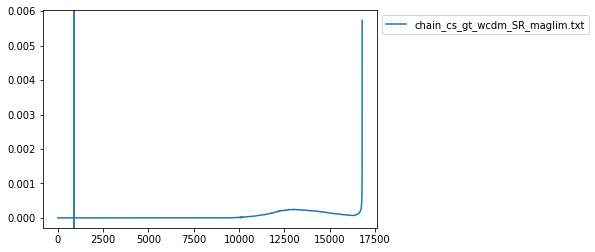

In [8]:
# filenames = [x for x in os.listdir('original_chains/') if x.endswith('.txt')]
filenames = [x for x in os.listdir(ogdir) if x.endswith('.txt')]
for filename in filenames:
    plt.figure()
    filename_full = os.path.join(ogdir, filename)
    header = ''
    keep_going = True
    with open(filename_full, 'r') as file:
        while keep_going:
            line = file.readline()
            if line.startswith('#'):
                header += line
            else:
                keep_going = False
    header = header.replace('END_OF_PRIORS_INI\n','END_OF_PRIORS_INI')
    array = np.loadtxt(filename_full)

    # idx_first = np.where(array[:,-1]>1e-30*np.max(array[:,-1]))[0][0]
    idx_first = np.where(array[:,-1]>0.)[0][0]
    
    line = plt.plot(array[:,-1], label=filename)
    plt.axvline(idx_first, c=line[0].get_color())
    plt.axvline(np.where(array[:,-1]>0.)[0][0], c=line[0].get_color())
    plt.legend(bbox_to_anchor=(1,1))
    filename_out = os.path.join(trimdir, filename)
    print(filename_out, len(array), idx_first, len(array[idx_first:,:]))
    np.savetxt(fname=filename_out, X=array[idx_first:,:], header=header, comments='')
    plt.show()